In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
%matplotlib inline

tf.set_random_seed(7777)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
tf.__version__

'2.0.0'

# Tensorflow 자료형

## tf.constant

In [3]:
sess=tf.Session()

In [4]:
# 초기화 되면서 메모리 크기와 type이 결정
# 세션 실행 시 자동으로 초기화 
# 고정된 크기 
a=tf.constant([5])
b=tf.constant([10.0,20,30])
c=tf.constant([10,20,30],dtype=tf.float32)

## tf.placeholder

In [5]:
# 학습 및 테스트 데이터를 담는 그릇 역할 / 자료구조만 정해주고, 나중에 data를 공급받음 / 반복적으로 feeding가능 
# 가변 / 갯수의 크기가 정해져 있지 않음
x=tf.placeholder(dtype=tf.float32)
input_data=[1,2,3,4,5]
sess.run(x,feed_dict={x:input_data})

array([1., 2., 3., 4., 5.], dtype=float32)

## tf.Variable

In [6]:
# constant처럼 고정된 크기의 메모리 공간
# 반복적으로 읽고 쓰기 가능 / 반드시 초기화 되어야함
input_data=[1,2,3,4,5]
w=tf.Variable(input_data,dtype=tf.float32)
init=tf.global_variables_initializer()
sess.run(init)

In [7]:
# 텐서 정보 입력 & 그래프 
x=tf.placeholder(dtype=tf.float32)
w=tf.Variable([2.0])
b=tf.constant([1.4])
y=w*x+b

init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

out1=sess.run(y,feed_dict={x:[1,2,3]})
out2=sess.run(y,feed_dict={x:[-1.0,-2.0]})

# 텐서 생성

In [8]:
a=tf.constant(2.0)
print(a)
# 결과값 읽어오기
print(sess.run(a))

Tensor("Const_4:0", shape=(), dtype=float32)
2.0


In [9]:
# 한 행이여서 0차원이다
a.shape

TensorShape([])

In [10]:
# 대괄호는 벡터라는 뜻 
b=tf.constant([2.0])
print(sess.run(b))

[2.]


In [11]:
m=tf.constant([[1,2],[3,4],[5,6]])
print(m)
print(m.shape[0])
print(sess.run(m))
# sess run을 하면 numpy로 변함
print(type(sess.run(m)))

Tensor("Const_6:0", shape=(3, 2), dtype=int32)
3
[[1 2]
 [3 4]
 [5 6]]
<class 'numpy.ndarray'>


In [12]:
a=tf.constant(np.array([1,2,3,4,5,6]),shape=(2,3))
print(sess.run(a))

[[1 2 3]
 [4 5 6]]


In [13]:
# 주어진 크기보다 작을 경우 가장 마지막 원소가 자동으로 채워짐
print(sess.run(tf.constant([0,1,2],shape=[4,2])))

[[0 1]
 [2 2]
 [2 2]
 [2 2]]


In [14]:
a=tf.constant([[1,2,3]],shape=[3,1])

In [15]:
sess.run(a)

array([[1],
       [2],
       [3]])

In [16]:
# 텐서의 자세한 정보
print(a.op)

name: "Const_9"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_INT32
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_INT32
      tensor_shape {
        dim {
          size: 3
        }
        dim {
          size: 1
        }
      }
      tensor_content: "\001\000\000\000\002\000\000\000\003\000\000\000"
    }
  }
}



In [17]:
a=tf.constant([1,2,3])
b=tf.constant([3,5,6])
c=a>b
print(sess.run(c))

[False False False]


In [18]:
b=tf.constant([3])

In [19]:
print(type(b))

<class 'tensorflow.python.framework.ops.Tensor'>


In [20]:
input_data=[1,2,3,4,5]
x=tf.placeholder(dtype=tf.float32)
w=tf.Variable([2.0])
b=tf.constant([1.4])
y=w*x+b

init=tf.global_variables_initializer()

sess=tf.Session()
sess.run(init)

sess.run(y,feed_dict={x:[1,2,3]})


array([3.4, 5.4, 7.4], dtype=float32)

# 텐서의 행렬 연산

## 주가 지수 예측 모델 및 학습 시각화

In [21]:
# 행렬 슬라이싱
a=tf.constant([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
# data,시작점,크기
b=tf.slice(a,[1,0],[2,2])
print(sess.run(b))

[[4 5]
 [7 8]]


In [22]:
# 행렬 곱
x=tf.constant([[1,2],[4,5]])
y=tf.constant([[1,2,3],[4,5,6]])
result=tf.matmul(x,y)
print(sess.run(result))

[[ 9 12 15]
 [24 33 42]]


In [23]:
# 브로드 캐스팅
a=tf.constant([[1,2,3],[4,5,6]])
b=a+4
print(sess.run(b))

[[ 5  6  7]
 [ 8  9 10]]


In [24]:
# 차원 줄이는 함수 reduce / 전체 원소를 대표하는 값으로 변경해 차원을 줄이는 함수
# 1차원 벡터에 대해 0차원 실수 return
a=tf.constant([1.0,2.3,4.5])
print(sess.run(tf.reduce_sum(a)))
print(sess.run(tf.reduce_min(a)))


7.8
1.0


In [25]:
# uniform
a=tf.random_uniform([2,3],-5,5)
b=tf.random_uniform([2,3],minval=5,maxval=15)
print(sess.run(a))
print(sess.run(b))

[[ 3.9401894  1.9416962  1.1391459]
 [ 3.662921  -3.5046422 -3.6932552]]
[[10.997519 12.611055 13.062453]
 [12.9743    9.66015  10.22086 ]]


In [26]:
# normal
a=tf.random_normal([5,10],mean=0,stddev=2)
b=tf.truncated_normal([5,10],mean=0,stddev=2)
print(sess.run(a))
print(sess.run(b))


[[-0.6319284   1.022173    3.3804648   0.781674    1.9805278   0.1476079
  -1.0330762   2.4227026   0.18303788  0.04627968]
 [ 0.7300202  -0.74113005 -1.4042388  -0.43195793  0.77893114  1.1683313
   0.12004654  0.47786897 -2.0982242   0.3081046 ]
 [-1.7894644  -4.2965193  -1.0355808  -1.7357363  -2.007953    2.2557907
   0.06919162 -0.9689868  -1.1654634   0.37264562]
 [-1.8474488  -2.1168401  -4.8420134   1.255901    2.4074023   3.44189
   3.062601   -0.13645309  2.2724006  -1.5840172 ]
 [-3.2594688  -0.33175552 -1.474855   -0.60791975 -0.14661676 -0.08185874
  -1.8099158   0.8741417  -0.3339359  -0.6865524 ]]
[[ 1.1448847   0.4132794  -1.7870595  -1.7605531  -3.3776126   2.3948221
  -1.1827478  -1.2364736  -0.50594944 -3.0333705 ]
 [ 0.2678286  -0.9253981  -0.7436163  -3.359538   -0.68126696 -3.2810946
  -2.5394583  -0.5036157  -0.9260828  -3.4495645 ]
 [ 0.758875   -0.21028444 -0.41015556  1.1326462  -0.33048978  1.5901394
  -0.80039525  0.5163683   0.12440596  2.768015  ]
 [-0.908

In [27]:
a=tf.convert_to_tensor([1,2,3,4])
type(a)

tensorflow.python.framework.ops.Tensor

## 1.Cost 이해하기

In [28]:
sess=tf.Session()

In [29]:
x_data=[1.0,2,3,4]
y_data=[1.1,2.2,3,4.2]

w=tf.placeholder(tf.float32)
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
hypothesis=w*x

# MSE
cost=tf.reduce_mean(tf.square(hypothesis))

In [30]:
c=sess.run(cost,feed_dict={x:x_data,y:y_data,w:-4})
print(cost)

Tensor("Mean:0", shape=(), dtype=float32)


In [31]:
print(c)

120.0


In [32]:
c=sess.run(cost,feed_dict={x:x_data,y:y_data,w:-2})
print(c)

30.0


In [33]:
c=sess.run(cost,feed_dict={x:x_data,y:y_data,w:-1})
print(c)

7.5


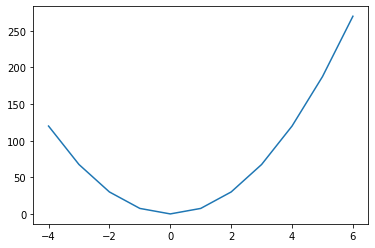

In [34]:
cs=[]
for v in [-4,-3,-2,-1,0,1,2,3,4,5,6]:
    c=sess.run(cost,feed_dict={x:x_data,y:y_data,w:v})
    cs.append(c)
    
plt.plot([-4,-3,-2,-1,0,1,2,3,4,5,6],cs)

# 2. 경사하강법 이해하기

In [35]:
learning_rate=0.1

w=tf.Variable(2.0)
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
hypothesis=w*x

cost=tf.reduce_mean(tf.square(hypothesis-y))
# w 지점에서의 기울기
gradient=tf.reduce_mean((w*x-y)*x)
descent=w-learning_rate*gradient
# update weight
update=w.assign(descent)

In [37]:
with tf.Session() as sess:
    writer=tf.su
    init=tf.global_variables_initializer()
    sess.run(init)
    sess.run(update,feed_dict={x:x_data,y:y_data})
    c,w_=sess.run([cost,w],feed_dict={x:x_data,y:y_data})
    print(c,w_)


0.43742207 1.2825


In [38]:
sess.run(update,feed_dict={x:x_data,y:y_data})
c,w_=sess.run([cost,w],feed_dict={x:x_data,y:y_data})
print(c,w_)

0.035229474 1.103125


In [39]:
sess.run(update,feed_dict={x:x_data,y:y_data})
c,w_=sess.run([cost,w],feed_dict={x:x_data,y:y_data})
print(c,w_)

0.010092459 1.0582812
